<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/project_week9_%EB%89%B4%EC%8A%A4%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D_streamlit_%ED%97%88%EA%B9%85%ED%8E%98%EC%9D%B4%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 진행 프로세스**

- ‘코스피’ 검색어에 대한 네이버 뉴스 OpenAPI 결과를 수집합니다.
    - (참고) 네이버 뉴스 API는 한번 호출할수 있는 데이터 건수를 **최대 1000건으로** 제한함으로 일단위로 API를 호출합니다.
                
- 최근 한달의 뉴스 제목(’title’) + 요약(’description’)은  LLM에 사용하기에 적합하게 정제합니다.

In [ ]:
import requests
import json
from datetime import datetime, timedelta
import pandas as pd
import time
from google.colab import userdata # 보안 비밀 기능을 사용하기 위해 userdata 라이브러리 추가

# 네이버 API 설정
# Google Colab 보안 비밀에서 Client ID와 Client Secret 가져오기
client_id = userdata.get('NAVER_CLIENT_ID')  # 보안 비밀 이름에 맞게 수정하세요.
client_secret = userdata.get('NAVER_CLIENT_SECRET') # 보안 비밀 이름에 맞게 수정하세요.
naver_api_url = "https://openapi.naver.com/v1/search/news.json"

def get_naver_news_month(keyword="코스피"):
    """
    네이버 API로 한달간 뉴스 수집 (json 자료 전체 사용)
    """


    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    all_news_data = []
    end_date = datetime(2025, 9, 12)
    start_date = datetime(2025, 8, 13)

    # 날짜별로 검색
    current = start_date
    while current <= end_date:
        date_str = current.strftime("%Y.%m.%d")

        queries = [
            f"{keyword} {date_str}",
            f"{keyword} {current.strftime('%m월 %d일')}",
            keyword
        ]

        for query in queries:
            url =  naver_api_url

            for start_idx in [1, 101, 201]:
                params = {
                    "query": query,
                    "display": 100,
                    "start": start_idx,
                    "sort": "date"
                }

                try:
                    response = requests.get(url, headers=headers, params=params)
                    if response.status_code == 200:
                        data = response.json()
                        if 'items' in data:
                            all_news_data.extend(data['items'])

                    time.sleep(0.05)

                except Exception as e:
                    print(f"오류: {e}")

        print(f"{date_str} 수집 완료")
        current += timedelta(days=1)

    return all_news_data

# 실행
print("네이버 API로 한달치 뉴스 수집 중...")
news_json = get_naver_news_month("코스피")
print(f"총 {len(news_json)}개의 JSON 자료 수집")

# 수집된 json 자료 출력 (예시)
if news_json:
    print("\n첫 3개의 뉴스 JSON 자료:")
    print(json.dumps(news_json[:3], indent=2, ensure_ascii=False))

네이버 API로 한달치 뉴스 수집 중...
2025.08.13 수집 완료
2025.08.14 수집 완료
2025.08.15 수집 완료
2025.08.16 수집 완료
2025.08.17 수집 완료
2025.08.18 수집 완료
2025.08.19 수집 완료
2025.08.20 수집 완료
2025.08.21 수집 완료
2025.08.22 수집 완료
2025.08.23 수집 완료
2025.08.24 수집 완료
2025.08.25 수집 완료
2025.08.26 수집 완료
2025.08.27 수집 완료
2025.08.28 수집 완료
2025.08.29 수집 완료
2025.08.30 수집 완료
2025.08.31 수집 완료
2025.09.01 수집 완료
2025.09.02 수집 완료
2025.09.03 수집 완료
2025.09.04 수집 완료
2025.09.05 수집 완료
2025.09.06 수집 완료
2025.09.07 수집 완료
2025.09.08 수집 완료
2025.09.09 수집 완료
2025.09.10 수집 완료
2025.09.11 수집 완료
2025.09.12 수집 완료
총 18523개의 JSON 자료 수집

첫 3개의 뉴스 JSON 자료:
[
  {
    "title": "<b>코스피</b> 상승 마감",
    "originallink": "https://www.newsis.com/view/NISI20250813_0020931037",
    "link": "https://n.news.naver.com/mnews/article/003/0013420513?sid=101",
    "description": "13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. <b>코스피</b>는 전 거래일(3189.91)보다 34.46포인트(1.08%) 오른 3224.37에 마감했다. <b>2025.08.13</b>.",
    "pubDate": "Wed, 13 Aug 2025 15:47:00 +0900"
  },
  {
    "title": "<b

In [ ]:
news_df = pd.DataFrame(news_json)
pre_news_df = news_df[['title', 'description', 'pubDate', 'link']]
pre_news_df

,title,description,pubDate,link
0,<b>코스피</b> 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. <b>코스피...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...
1,<b>코스피</b> 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. <b>코스피...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...
2,<b>코스피</b> 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. <b>코스피...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...
3,"코스닥, <b>코스피</b> 동반 상승",<b>코스피</b>는 전 거래일(3189.91)보다 34.46포인트(1.08%) 오...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...
4,美 증시 훈풍에 <b>코스피</b> 1% 상승 개장,<b>코스피</b>가 전 거래일(3189.91)보다 35.49포인트(1.11%) 상...,"Wed, 13 Aug 2025 09:22:00 +0900",https://n.news.naver.com/mnews/article/003/001...
...,...,...,...,...
18518,"풀무원 주가 9월 12일 14,960원…전일 대비 1.63% 상승 마감","12일 장 마감 기준, <b>코스피</b> 시장에서 풀무원 주가는 14,960원으로...","Fri, 12 Sep 2025 16:06:00 +0900",https://www.job-post.co.kr/news/articleView.ht...
18519,"다음주 美 금리 인하 기대감...환율 3.6원 하락한 1,388.2원",이날 <b>코스피</b> 지수는 사상 최고치를 3거래일 연속 경신했다. 전날보다 5...,"Fri, 12 Sep 2025 16:06:00 +0900",https://www.slist.kr/news/articleView.html?idx...
18520,"<b>코스피</b> 3,400선 눈앞…3거래일 연속 사상 최고치",오늘(12일) <b>코스피</b>가 3거래일 연속 사상 최고치를 경신했습니다. 오늘...,"Fri, 12 Sep 2025 16:05:00 +0900",https://n.news.naver.com/mnews/article/056/001...
18521,"<b>코스피</b> 3일 연속 최고치 경신, SK하이닉스 7% 상승 최고가 기록",<b>코스피</b>가 12일도 사상 최고치를 경신하며 상승 마감했다. 3일 연속 최...,"Fri, 12 Sep 2025 16:04:00 +0900",https://n.news.naver.com/mnews/article/241/000...


In [ ]:
import re
import pandas as pd # pandas 라이브러리 추가

def clean_text(text):
    # HTML 태그 제거 정규표현식 사용
    cleaned_text = re.sub('<.*?>', '', text)
    # 특수 문자 제거 (예: &quot;, <b> 등)
    cleaned_text = cleaned_text.replace('&quot;', '"').replace('<b>', '').replace('</b>', '')
    return cleaned_text

# .loc를 사용하여 SettingWithCopyWarning 방지
pre_news_df.loc[:, 'title'] = pre_news_df['title'].apply(clean_text)
pre_news_df.loc[:, 'description'] = pre_news_df['description'].apply(clean_text)
# 1. datetime으로 안전하게 변환 (변환 실패하면 NaT)
pre_news_df['pubDate_dt'] = pd.to_datetime(pre_news_df['pubDate'], errors='coerce')

# 2. datetime → "YYYY-MM-DD" 문자열로 변환
pre_news_df['date_only_str'] = pre_news_df['pubDate_dt'].dt.strftime('%Y-%m-%d')

# 🔹 title과 description이 같은 행은 1개만 남기기
pre_news_df = pre_news_df.drop_duplicates(subset=['title', 'description'], keep='first')


# 결과 확인
display(pre_news_df.head())

# 또는 문자열 형식으로 변환 (.dt.strftime 사용)
# pre_news_df['pubDate_date_string'] = pre_news_df['pubDate'].dt.strftime('%Y-%m-%d')
# display(pre_news_df.head())

,title,description,pubDate,link,pubDate_dt,date_only_str
0,코스피 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. 코스피는 전...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
1,코스피 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. 코스피는 전...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
2,코스피 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. 코스피는 전...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
3,"코스닥, 코스피 동반 상승",코스피는 전 거래일(3189.91)보다 34.46포인트(1.08%) 오른 3224....,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
4,美 증시 훈풍에 코스피 1% 상승 개장,코스피가 전 거래일(3189.91)보다 35.49포인트(1.11%) 상승한 3225...,"Wed, 13 Aug 2025 09:22:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 09:22:00+09:00,2025-08-13


In [ ]:
pre_news_df['pubDate_dt'].min(), pre_news_df['pubDate_dt'].max()

(Timestamp('2025-09-11 20:02:00+0900', tz='UTC+09:00'),
 Timestamp('2025-09-13 18:20:00+0900', tz='UTC+09:00'))

In [ ]:
pre_news_df

,title,description,pubDate,link,pubDate_dt,date_only_str
0,코스피 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. 코스피는 전...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
1,코스피 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. 코스피는 전...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
2,코스피 상승 마감,13일 오후 서울 중구 하나은행 딜링룸에서 딜러들이 업무를 하고 있다. 코스피는 전...,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
3,"코스닥, 코스피 동반 상승",코스피는 전 거래일(3189.91)보다 34.46포인트(1.08%) 오른 3224....,"Wed, 13 Aug 2025 15:47:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 15:47:00+09:00,2025-08-13
4,美 증시 훈풍에 코스피 1% 상승 개장,코스피가 전 거래일(3189.91)보다 35.49포인트(1.11%) 상승한 3225...,"Wed, 13 Aug 2025 09:22:00 +0900",https://n.news.naver.com/mnews/article/003/001...,2025-08-13 09:22:00+09:00,2025-08-13
...,...,...,...,...,...,...
18518,"풀무원 주가 9월 12일 14,960원…전일 대비 1.63% 상승 마감","12일 장 마감 기준, 코스피 시장에서 풀무원 주가는 14,960원으로 거래를 마쳤...","Fri, 12 Sep 2025 16:06:00 +0900",https://www.job-post.co.kr/news/articleView.ht...,2025-09-12 16:06:00+09:00,2025-09-12
18519,"다음주 美 금리 인하 기대감...환율 3.6원 하락한 1,388.2원",이날 코스피 지수는 사상 최고치를 3거래일 연속 경신했다. 전날보다 51.34포인트...,"Fri, 12 Sep 2025 16:06:00 +0900",https://www.slist.kr/news/articleView.html?idx...,2025-09-12 16:06:00+09:00,2025-09-12
18520,"코스피 3,400선 눈앞…3거래일 연속 사상 최고치",오늘(12일) 코스피가 3거래일 연속 사상 최고치를 경신했습니다. 오늘 코스피는 전...,"Fri, 12 Sep 2025 16:05:00 +0900",https://n.news.naver.com/mnews/article/056/001...,2025-09-12 16:05:00+09:00,2025-09-12
18521,"코스피 3일 연속 최고치 경신, SK하이닉스 7% 상승 최고가 기록",코스피가 12일도 사상 최고치를 경신하며 상승 마감했다. 3일 연속 최고치다. 이날...,"Fri, 12 Sep 2025 16:04:00 +0900",https://n.news.naver.com/mnews/article/241/000...,2025-09-12 16:04:00+09:00,2025-09-12


**2. 진행 프로세스**

- ‘긍정,부정,중립’으로 판단이 가능한 감성 분석 모델을 불러옵니다.(허깅페이스 사용)
- ‘코스피’ 관련 최근 한달간의 뉴스에 대해 감성 분석을 진행합니다.
    - 예측한 감성 중 긍정/부정/중립 중 가장 많은 감성을 확인합니다.
    - 결과물의 감성은 LLM에 맞게 정제하며 제시된 결과물과 다를수 있음
- 감정분석이 완료된 자료는 대시보드 개발을 위해 ‘허깅페이스감정분석.csv’ 로 저장합니다.

In [ ]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

model_name = "alsgyu/sentiment-analysis-fine-tuned-model"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
print(model.config.id2label)  # 레이블 매핑 확인

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True
)
# 결과를 저장할 리스트들 초기화
results = []
for idx, (title, description, pubDate, date_only_str, link) in enumerate(zip(pre_news_df['title'], pre_news_df['description'], pre_news_df['pubDate_dt'], pre_news_df['date_only_str'], pre_news_df['link'])):
    # 제목과 내용을 결합하여 분석
    # NaN 값 처리
    title_clean = str(title) if pd.notna(title) else ""
    description_clean = str(description) if pd.notna(description) else ""

    # 제목과 내용을 결합하여 분석
    text = f"{title_clean} : {description_clean}".strip()
    # 텍스트 길이 제한 (모델의 최대 입력 길이 고려)
    if len(text) > 500:
        text = text[:500]
    # 감성 분석 실행
    sentiment_result = sentiment_analyzer(text)[0]
    # 결과 정리
    #label = sentiment_result[0]['label']
    #score = sentiment_result[0]['score']
    label_map = {
        'LABEL_0': '부정',
        'LABEL_1': '중립',
        'LABEL_2': '긍정'
    }
    best = max(sentiment_result, key=lambda x: x['score'])
    final_label = label_map[best['label']]
    final_score = best['score']

    result = {
        'date': pubDate,
        'title': title,
        'description': description,
        'link': link,
        'date_only_str': date_only_str,
        'sentiment': final_label,
        'sentiment_score': round(final_score, 4)
    }
    results.append(result)
    # 진행상황 출력
    if (idx + 1) % 1000 == 0:
        print(f"진행률: {idx + 1}/{len(pre_news_df)} ({(idx + 1)/len(pre_news_df)*100:.1f}%)")
        #print(f"최근 분석: {final_label} ({final_score:.3f}) - {title_clean[:50]}...")

print("분석 완료!")
df_results = pd.DataFrame(results)
# 감성 분포 확인
sentiment_counts = df_results['sentiment'].value_counts()
print("감성분석 결과 요약")
print("-" * 30)
for sentiment, count in sentiment_counts.items():
    percentage = count / len(df_results) * 100
    print(f"{sentiment}: {count}개 ({percentage:.1f}%)")

print(f"가장 많은 감성: {sentiment_counts.index[0]}")
print(f"평균 신뢰도: {df_results['sentiment_score'].mean():.3f}")


Device set to use cpu


{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2'}
진행률: 1000/18523 (5.4%)
진행률: 2000/18523 (10.8%)
진행률: 3000/18523 (16.2%)
진행률: 4000/18523 (21.6%)
진행률: 5000/18523 (27.0%)
진행률: 6000/18523 (32.4%)
진행률: 7000/18523 (37.8%)
진행률: 8000/18523 (43.2%)
진행률: 9000/18523 (48.6%)
진행률: 10000/18523 (54.0%)
진행률: 11000/18523 (59.4%)
진행률: 12000/18523 (64.8%)
진행률: 13000/18523 (70.2%)
진행률: 14000/18523 (75.6%)
진행률: 15000/18523 (81.0%)
진행률: 16000/18523 (86.4%)
진행률: 17000/18523 (91.8%)
진행률: 18000/18523 (97.2%)
분석 완료!
감성분석 결과 요약
------------------------------
긍정: 15401개 (83.1%)
중립: 2867개 (15.5%)
부정: 255개 (1.4%)
가장 많은 감성: 긍정
평균 신뢰도: 0.636


감성분석 결과 요약
------------------------------
긍정: 15401개 (83.1%)

중립: 2867개 (15.5%)

부정: 255개 (1.4%)

------------------------------
가장 많은 감성: 긍정

평균 신뢰도: 0.636

In [ ]:
# CSV 파일로 저장
output_filename = '허깅페이스감정분석.csv'
df_results.to_csv(output_filename, index=False, encoding='utf-8-sig')
print(f"결과 저장 완료: {output_filename}")

결과 저장 완료: 허깅페이스감정분석.csv


**3. 진행 프로세스**

- 최근 1개월의 코스피 라인 그래프를 표시합니다. (Pykrx으로 데이터 불러오기)
    
            
- 최근 1개월의 코스피 감성분석 자료의 ‘긍정’,’부정’,’중립’의 추세를 라인 그래프로 표시합니다.
- 최근 1개월의 코스피 긍정뉴스 감성 확률값을 코스피지수 라인 그래프의 우측에 표시합니다.

In [ ]:
!pip install pykrx

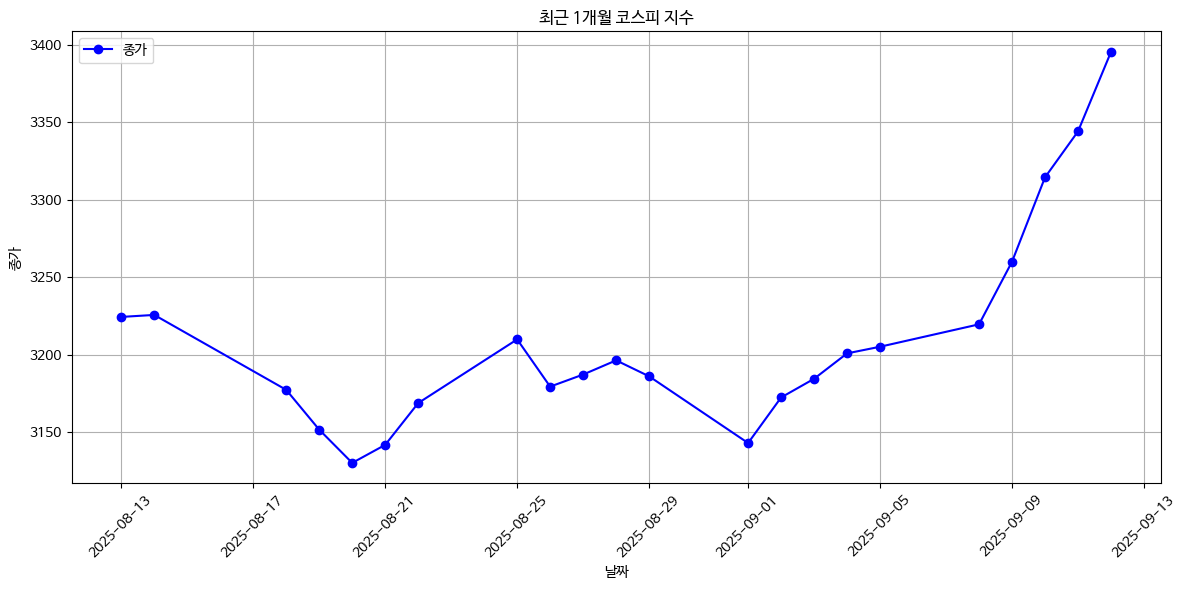

In [ ]:
from datetime import datetime, timedelta
from pykrx import stock
import matplotlib.pyplot as plt

# 코스피 지수
df = stock.get_index_ohlcv_by_date("20250813", "20250914", "1001")

# 종가 라인 그래프
plt.figure(figsize=(12,6))
plt.plot(df.index, df['종가'], label='종가', color='blue', marker='o')
plt.title('최근 1개월 코스피 지수')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.head(5)

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2025-08-13,3225.40,3226.37,3192.17,3224.37,320069786,10352059537799,2652083637181810
2025-08-14,3226.52,3239.55,3210.83,3225.66,441467896,10002172706811,2652623803641114
2025-08-18,3202.63,3206.77,3177.28,3177.28,326132755,8941932487220,2612867377572908
2025-08-19,3185.04,3185.48,3142.48,3151.56,285290653,8624169781604,2592063275359109
2025-08-20,3121.52,3132.83,3079.27,3130.09,335285191,11773562869622,2574971562273452


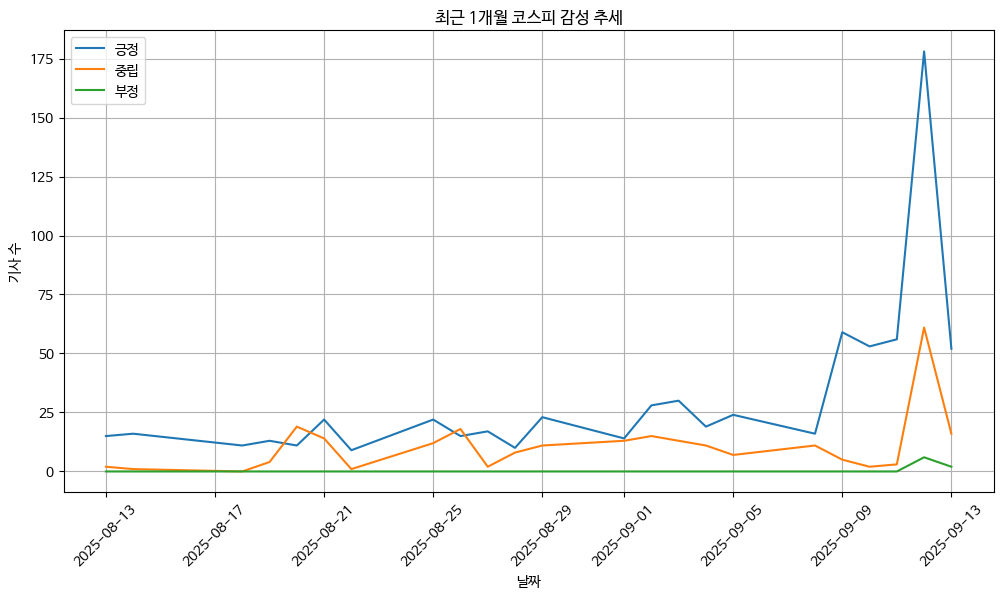

In [ ]:
import pandas as pd
df_news = pd.read_csv("/content/허깅페이스감정분석.csv")

start_date_filter = '2025-08-13'
df_news = df_news[df_news['date_only_str'] >= start_date_filter].copy()
df_news.head()
df_news['date'] = pd.to_datetime(df_news['date'])
# title과 description이 같은 행은 1개만 남기기
df_news = df_news.drop_duplicates(subset=['title', 'description'], keep='first')


# 날짜별 sentiment count 집계 ('date' 컬럼을 기준으로 Grouper 사용)
sentiment_trend = df_news.groupby([pd.Grouper(key='date', freq='D'), 'sentiment']).size().unstack(fill_value=0)

# 라인 그래프 그리기
plt.figure(figsize=(12,6))
for sentiment in ['긍정', '중립', '부정']:
    if sentiment in sentiment_trend.columns:
        plt.plot(sentiment_trend.index, sentiment_trend[sentiment], label=sentiment)

plt.title("최근 1개월 코스피 감성 추세")
plt.xlabel("날짜")
plt.ylabel("기사 수")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

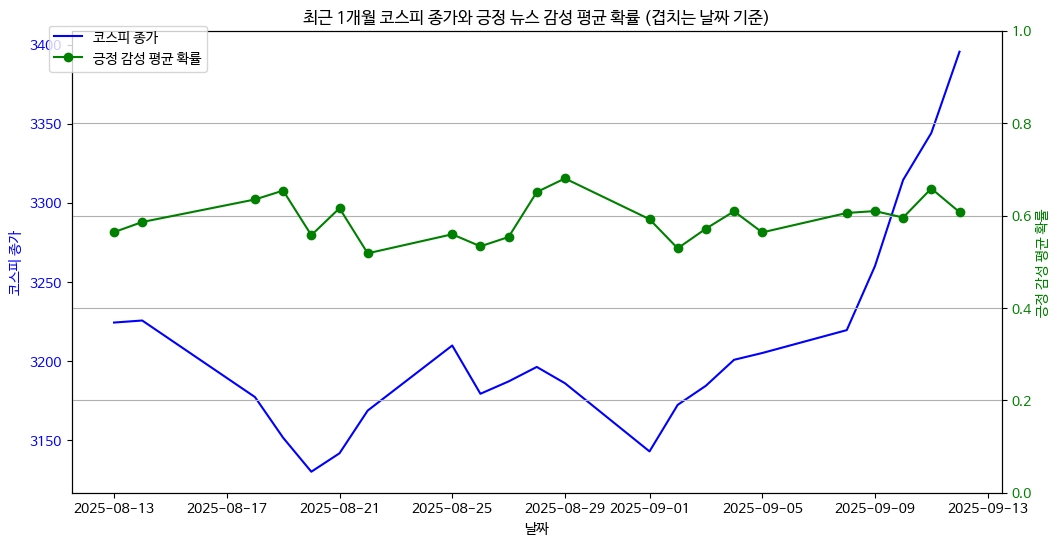

In [ ]:
# 날짜 컬럼 datetime 변환
df_news['date_only_str'] = pd.to_datetime(df_news['date_only_str'])
# title과 description이 같은 행은 1개만 남기기
df_news = df_news.drop_duplicates(subset=['title', 'description'], keep='first')
# 최근 1개월 필터링
last_month = df_news['date_only_str'].max() - pd.DateOffset(months=1)
df_last_month = df_news[df_news['date_only_str'] >= last_month]


# 긍정 뉴스만 선택
positive_sentiment = df_last_month[df_last_month['sentiment'] == '긍정']

# 날짜를 index로 설정 (코스피와 동일하게 맞추기)
positive_sentiment = positive_sentiment.set_index('date_only_str')

# 코스피 종가도 최근 1개월로 자르기
kospi_close = df['종가']
kospi_close = kospi_close[kospi_close.index >= last_month]

# 날짜 겹치는 부분만 선택
common_dates = kospi_close.index.intersection(positive_sentiment.index)
kospi_close = kospi_close.loc[common_dates]

# 긍정 뉴스 감성 평균 확률값 계산 (0~1 범위)
positive_mean_score = positive_sentiment.groupby(positive_sentiment.index).mean(numeric_only=True)['sentiment_score']
# ↑ 감성 확률 컬럼명이 probability라 가정 (여기에 실제 확률 컬럼명 넣으시면 됩니다)

positive_mean_score = positive_mean_score.loc[common_dates]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12,6))

# 코스피 종가 라인
ax1.plot(kospi_close.index, kospi_close, color='blue', label='코스피 종가')
ax1.set_xlabel('날짜')
ax1.set_ylabel('코스피 종가', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 긍정 뉴스 감성 확률 라인 (우측 y축)
ax2 = ax1.twinx()
ax2.plot(positive_mean_score.index, positive_mean_score, color='green', label='긍정 감성 평균 확률', marker='o')
ax2.set_ylabel('긍정 감성 평균 확률', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1)  # 감성 점수 범위 고정

# 범례 설정
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.title('최근 1개월 코스피 종가와 긍정 뉴스 감성 평균 확률 (겹치는 날짜 기준)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**4. 진행 프로세스**

- 스트림릿의 디자인 및 구성요소는  지시사항과 일치하지 않아도 괜찮습니다. 자유롭게 의미있는 대시보드를 구성해보세요
- 페이지 좌측 사이드바를 구성합니다.
    - 분석자료 업로드:  ‘허깅페이스감정분석.csv’를 업로드 합니다.
    - 분석자료 감성별 집계 테이블 표시
- 페이지 우측 본문을 구성합니다.  (아래는 예시이며 디자인 및 구성요소는 자유구성입니다.)
    - 뉴스기사를 선택하면 링크로 이동하여 원문을 확인할수 있도록 합니다.
    - 테이블표의 상단에 긍정,부정,중립 자료만 필터링 되는 Tab을 구성합니다.
    - 3번에서 작업하였던 차트를 생성하여 대시보드를 완성합니다.

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from pykrx import stock

st.set_page_config(layout="wide")

# =========================
# 사이드바: CSV 업로드
# =========================
st.sidebar.header("파일 업로드")
uploaded_file = st.sidebar.file_uploader("감성 분석 결과 CSV 파일 선택", type="csv")

df_news = None
if uploaded_file:
    df_news = pd.read_csv(uploaded_file, parse_dates=['date'])
    start_date_filter = '2025-08-13'
    df_news = df_news[df_news['date_only_str'] >= start_date_filter].copy()
    df_news.head()
    df_news['date'] = pd.to_datetime(df_news['date'])

    # 날짜만 남기기
    df_news['date_only'] = pd.to_datetime(df_news['date'].dt.date)

    # title과 description이 같은 행은 1개만 남기기
    df_news = df_news.drop_duplicates(subset=['title', 'description'], keep='first')

    st.sidebar.success("파일 업로드 완료!")

    # 사이드바: 감성별 집계 테이블 표시
    st.sidebar.header("감성 분석 결과 요약")
    sentiment_counts = df_news['sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['감성', '개수']
    st.sidebar.dataframe(sentiment_counts)

# =========================
# 본문
# =========================
st.title("코스피 뉴스 감성 분석 대시보드")

if df_news is not None:
    # 탭 구성
    tab_all, tab_positive, tab_neutral, tab_negative = st.tabs(["전체 뉴스", "긍정 뉴스", "중립 뉴스", "부정 뉴스"])
    def make_link(row):
        if pd.notnull(row['link']):
            return f"<a href='{row['link']}' target='_blank'>{row['title']}</a>"
        else:
            return row['title']
    with tab_all:
        st.header("전체 뉴스 목록")
        # 링크 컬럼 추가 및 HTML 렌더링

        df_display = df_news[['date', 'title', 'description', 'sentiment', 'sentiment_score', 'link']].copy()
        # 뉴스 제목에 링크를 걸어서 HTML로 표시

        df_display['뉴스제목(클릭시 이동)'] = df_display.apply(make_link, axis=1)
        # 필요한 컬럼만 표시, HTML 링크 포함
        st.markdown(
            df_display[['date', '뉴스제목(클릭시 이동)', 'description', 'sentiment', 'sentiment_score']]
            .to_html(escape=False, index=False),
            unsafe_allow_html=True
        )

        st.dataframe(df_display)


    with tab_positive:
        st.header("긍정 뉴스 목록")
        df_positive = df_news[df_news['sentiment'] == '긍정']
        st.dataframe(df_positive[['date', 'title', 'description', 'sentiment_score']])

    with tab_neutral:
        st.header("중립 뉴스 목록")
        df_neutral = df_news[df_news['sentiment'] == '중립']
        st.dataframe(df_neutral[['date', 'title', 'description', 'sentiment_score']])

    with tab_negative:
        st.header("부정 뉴스 목록")
        df_negative = df_news[df_news['sentiment'] == '부정']
        st.dataframe(df_negative[['date', 'title', 'description', 'sentiment_score']])


    # =========================
    # 차트 표시
    # =========================
    st.header("코스피 지수 및 감성 추세")

    # 코스피 지수 데이터 가져오기 (최근 1개월)
    # 데이터 가져오는 날짜를 df_news의 날짜 범위에 맞춥니다.
    if not df_news.empty:
        start_date_kospi = df_news['date_only'].min().strftime('%Y%m%d')
        end_date_kospi = df_news['date_only'].max().strftime('%Y%m%d')

        try:
            df_kospi = stock.get_index_ohlcv_by_date(start_date_kospi, end_date_kospi, "1001")
            df_kospi.index = pd.to_datetime(df_kospi.index)
        except Exception as e:
            st.error(f"코스피 지수 데이터를 가져오는 중 오류 발생: {e}")
            df_kospi = None

    else:
        df_kospi = None
        st.warning("감성 분석 데이터가 없습니다. 코스피 지수 차트를 표시할 수 없습니다.")


    if df_kospi is not None:
        # 날짜별 sentiment count 집계
        sentiment_trend = df_news.groupby([pd.Grouper(key='date_only', freq='D'), 'sentiment']).size().unstack(fill_value=0)

        # 코스피 종가와 감성 추세 결합
        # 두 데이터프레임의 인덱스(날짜)를 기준으로 합칩니다.
        combined_df = df_kospi[['종가']].join(sentiment_trend, how='inner')

        if not combined_df.empty:
            # Plotly를 사용하여 인터랙티브한 차트 생성
            fig = go.Figure()

            # 코스피 종가 라인 (좌측 y축)
            fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['종가'], mode='lines+markers', name='코스피 종가', yaxis='y1'))

            # 감성별 추세 라인 (우측 y축)
            sentiments = ['긍정', '중립', '부정']
            colors = {'긍정': 'green', '중립': 'orange', '부정': 'red'}
            for sentiment in sentiments:
                if sentiment in combined_df.columns:
                    fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df[sentiment], mode='lines+markers', name=f'{sentiment} 뉴스 수', yaxis='y2', line=dict(color=colors[sentiment])))

            # 레이아웃 설정
            fig.update_layout(
                title='코스피 지수 및 감성 추세',
                xaxis_title='날짜',
                yaxis=dict(
                    title='코스피 종가',
                    titlefont=dict(color='blue'),
                    tickfont=dict(color='blue')
                ),
                yaxis2=dict(
                    title='뉴스 수',
                    titlefont=dict(color='gray'),
                    tickfont=dict(color='gray'),
                    overlaying='y',
                    side='right'
                ),
                hovermode='x unified' # 툴팁 표시 방식
            )

            st.plotly_chart(fig, use_container_width=True)

            # 부정 뉴스 감성 확률 라인 (우측 y축)
            st.header("코스피 종가와 긍정 뉴스 감성 평균 점수")
            # 부정 뉴스만 추출하여 날짜별 평균 점수 계산
            negative_trend_score = df_news[df_news['sentiment']=='긍정'].groupby(pd.Grouper(key='date_only', freq='D'))['sentiment_score'].mean()

            # 코스피 종가와 긍정 감성 점수 결합
            combined_score_df = df_kospi[['종가']].join(negative_trend_score, how='inner')

            if not combined_score_df.empty:
                fig_score = go.Figure()

                # 코스피 종가 라인 (좌측 y축)
                fig_score.add_trace(go.Scatter(x=combined_score_df.index, y=combined_score_df['종가'], mode='lines+markers', name='코스피 종가', yaxis='y1'))

                # 긍정 감성 평균 점수 라인 (우측 y축)
                if 'sentiment_score' in combined_score_df.columns:
                    fig_score.add_trace(go.Scatter(x=combined_score_df.index, y=combined_score_df['sentiment_score'], mode='lines+markers', name='부정 감성 평균 점수', yaxis='y2', line=dict(color='red')))

                # 레이아웃 설정
                fig_score.update_layout(
                    title='코스피 종가와 긍정 뉴스 감성 평균 점수',
                    xaxis_title='날짜',
                    yaxis=dict(
                        title='코스피 종가',
                        titlefont=dict(color='blue'),
                        tickfont=dict(color='blue')
                    ),
                    yaxis2=dict(
                        title='긍정 감성 평균 점수',
                        titlefont=dict(color='red'),
                        tickfont=dict(color='red'),
                        overlaying='y',
                        side='right',
                        range=[0, 1] # 감성 점수 범위 0~1로 고정
                    ),
                    hovermode='x unified' # 툴팁 표시 방식
                )
                st.plotly_chart(fig_score, use_container_width=True)
            else:
                st.warning("긍정 뉴스 감성 평균 점수 데이터를 표시할 수 없습니다 (겹치는 날짜 없음 또는 부정 뉴스 없음).")


        else:
            st.warning("코스피 지수 및 감성 추세 차트를 표시할 수 없습니다 (겹치는 날짜 없음).")


elif uploaded_file is None:
    st.info("왼쪽 사이드바에서 감성 분석 결과 CSV 파일을 업로드해주세요.")

Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx lt --port 8501

⠙⠹⠸⠼

⠴⠦⠧⠇npm error could not determine executable to run
⠇npm error A complete log of this run can be found in: /root/.npm/_logs/2025-09-13T15_31_30_619Z-debug-0.log
⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.224.158.41:8501

  Stopping...


**4. streamlit 결과 내용**

stremlit 으로 구현한 브라우저 캡처본으로 드립니다

전체 목록을 만들어 제목을 선택하면 해당 URL 주소로 이동되게 하였습니다

긍정, 중립, 부정 탭을 3개로 나누어 각각 보이게 하였고 하단에 그래프 표기되도록 하였습니다


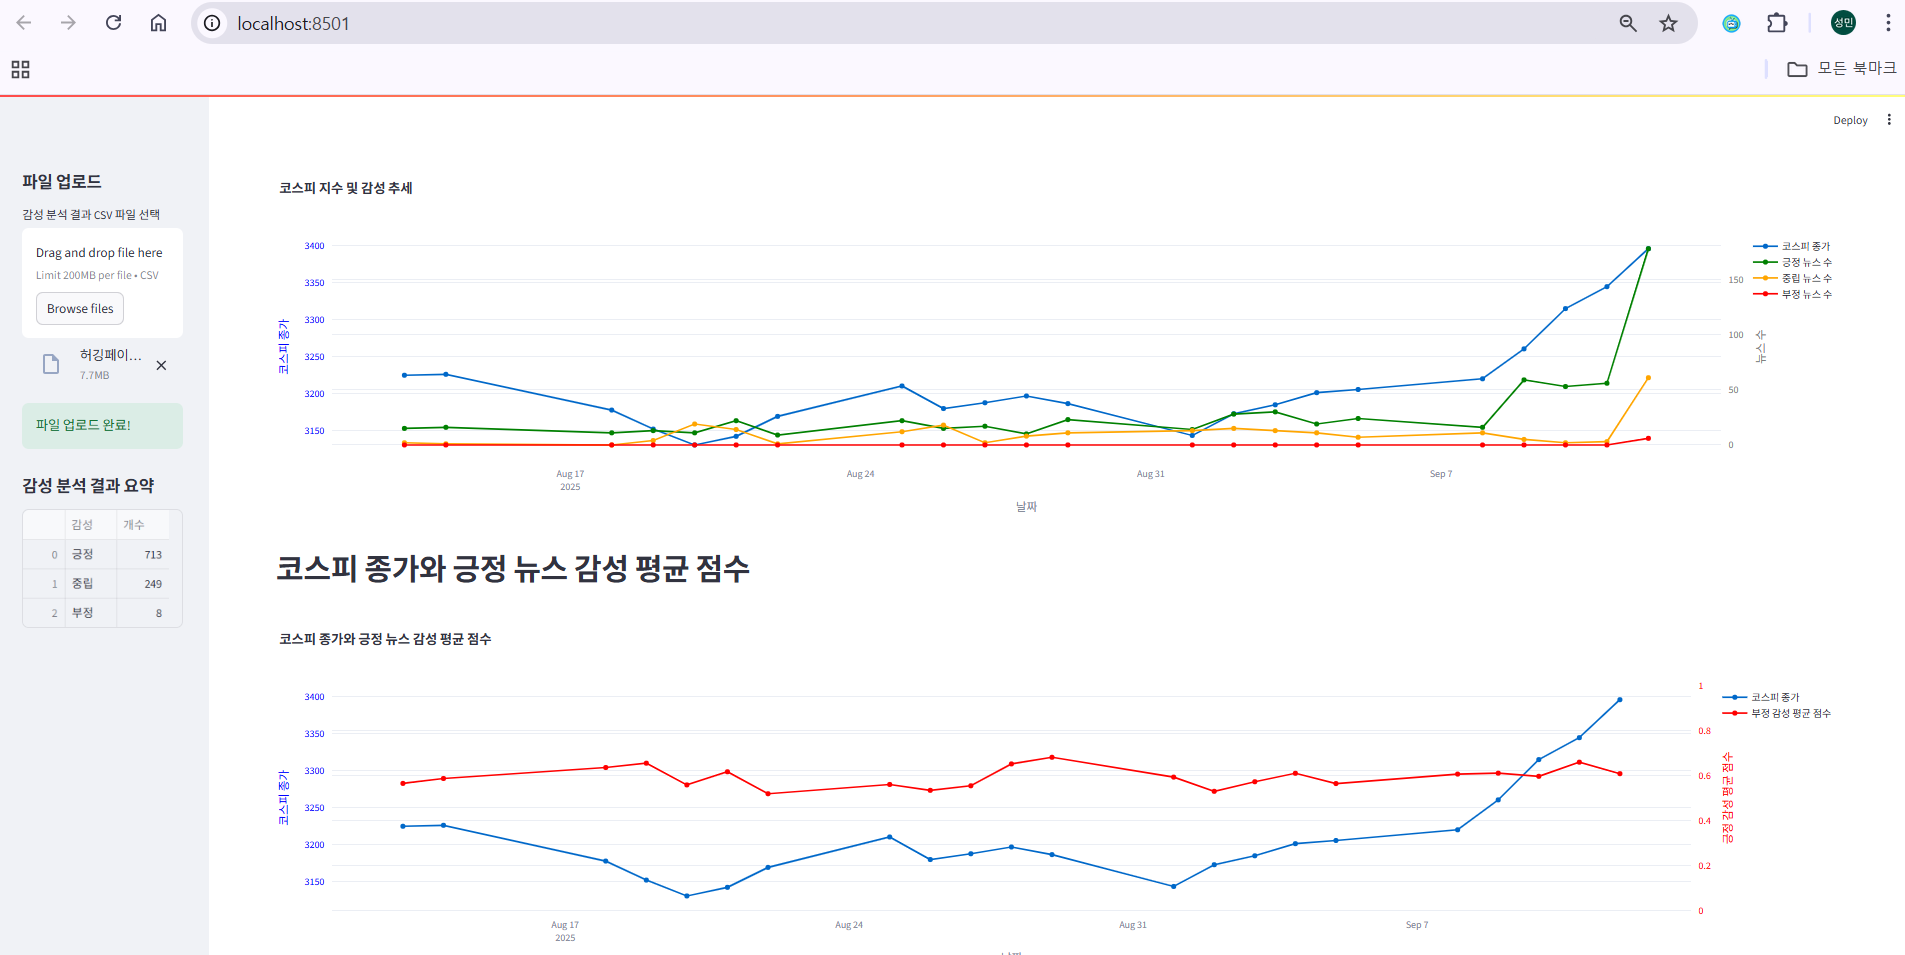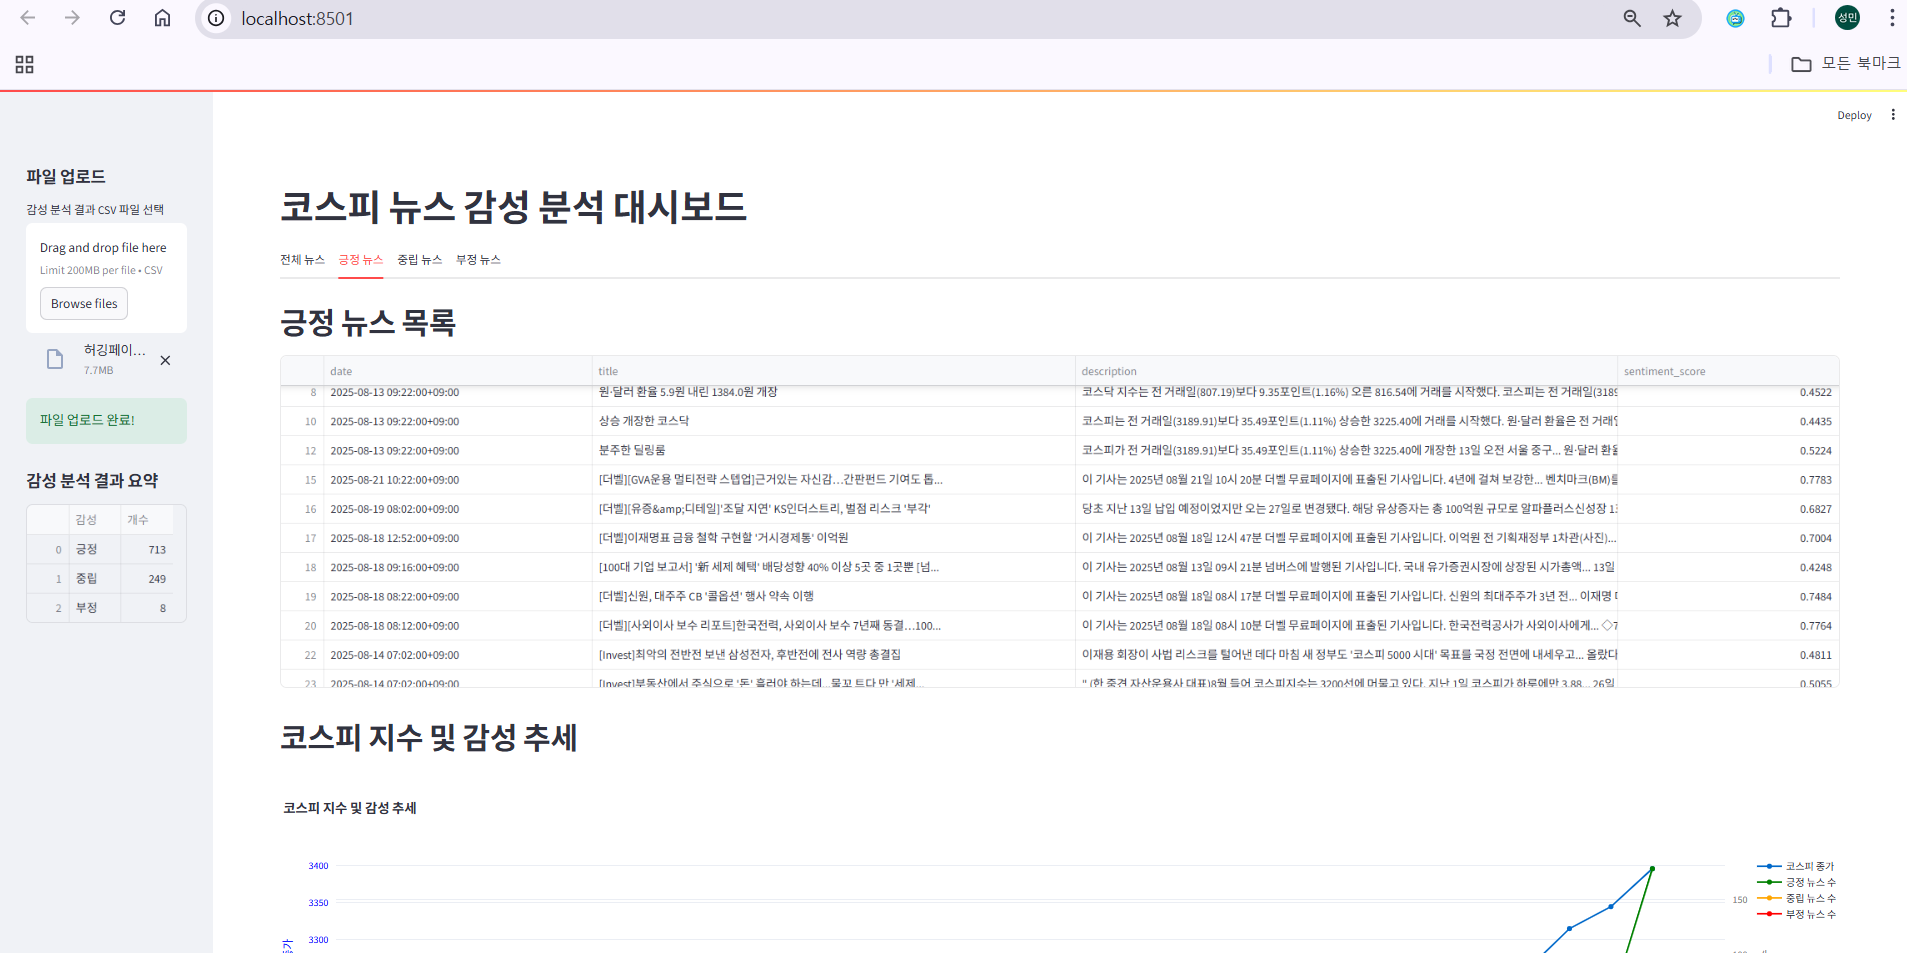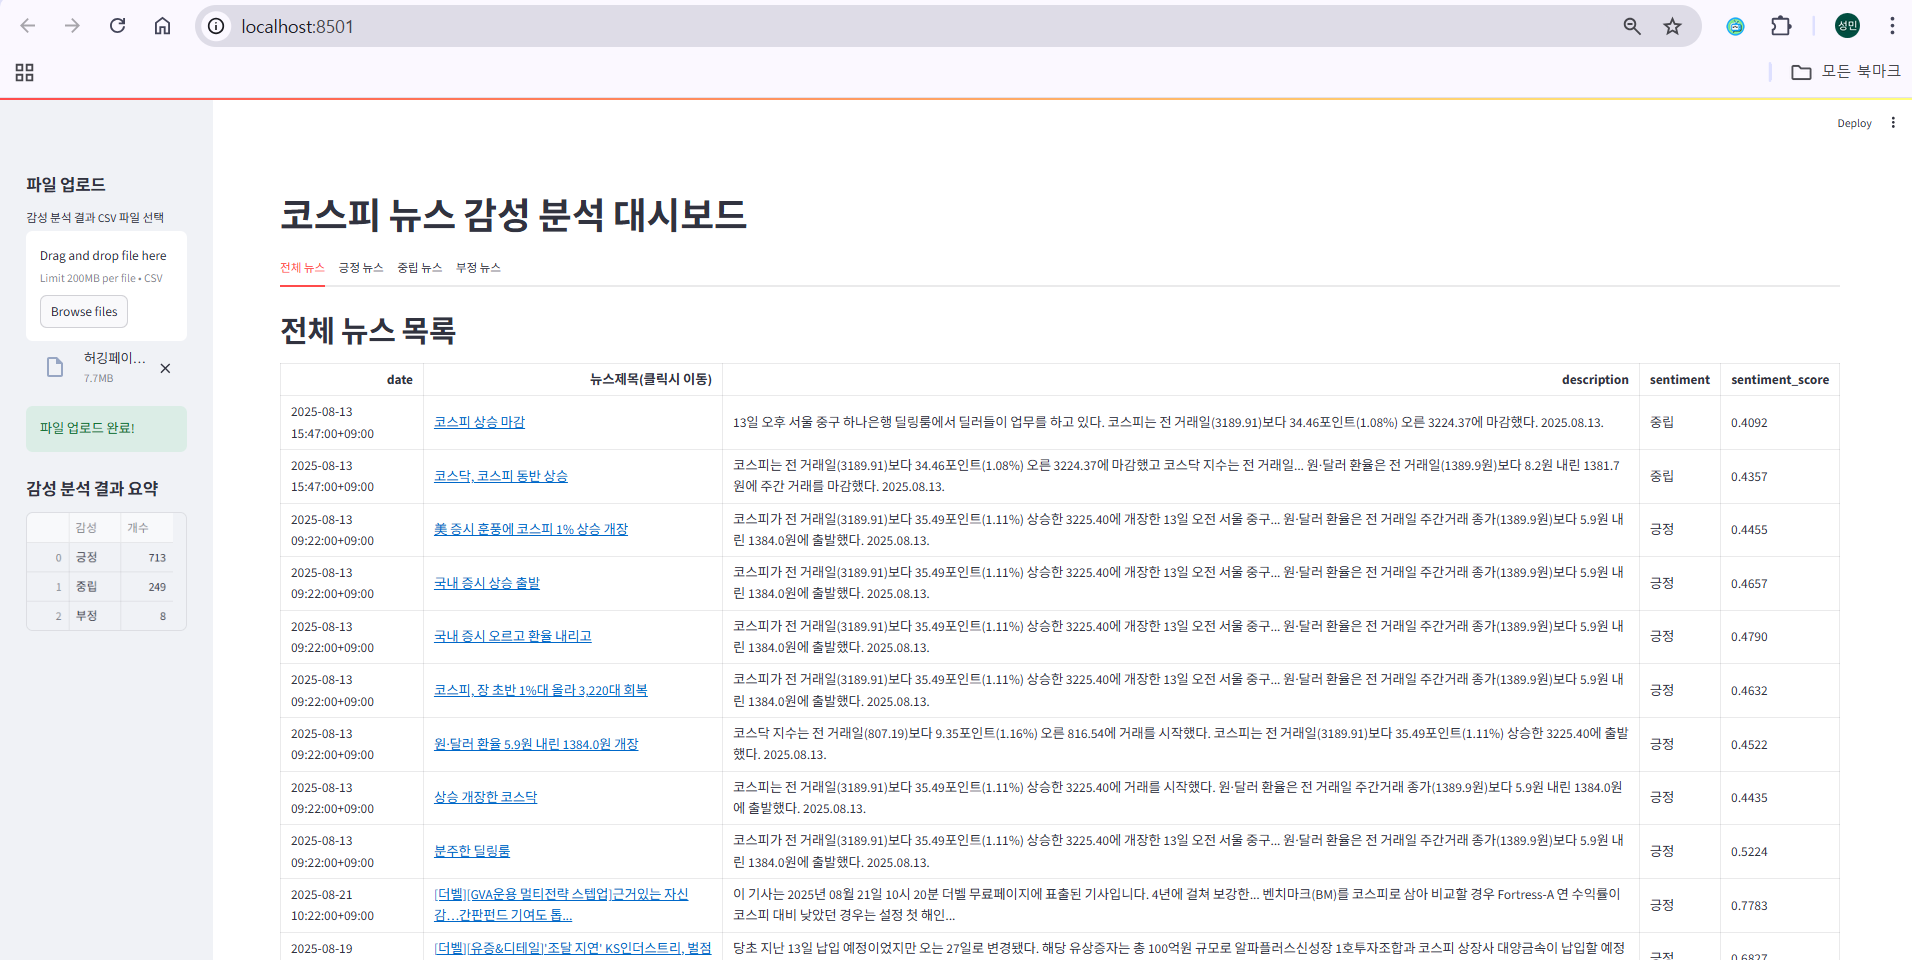